In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as api 
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full , y_train_full) , (x_test , y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top' , 'Trousar' , 'Pullover' , 'Dress' , 'Coat',
               'Sandal' , 'Shirt' ,'Sneaker' , 'Bag' , 'Ankle Boot']

# Data Reshape

In [6]:
x_train_full = x_train_full.reshape((60000 , 28 ,28 ,1))
x_test = x_test = x_test.reshape((10000 , 28 , 28 , 1))

# Data Normalization

In [7]:
x_train_n = x_train_full/255.
x_test_n = x_test /255.

In [8]:
x_valid , x_train = x_train_n[:5000], x_train_n[5000:]
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

# Creat the model Architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 32 , kernel_size =(3,3) , strides = 1 , padding ='valid',activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300 , activation ='relu'))
model.add(keras.layers.Dense(100 , activation = 'relu'))
model.add(keras.layers.Dense(10 , activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy' , 
             optimizer = 'sgd',
             metrics =['accuracy'])

In [13]:
model_history = model.fit(x_train , y_train , epochs =10 , batch_size = 64,
                         validation_data = (x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 24s 428us/sample - loss: 0.8754 - accuracy: 0.7047 - val_loss: 0.5981 - val_accuracy: 0.7790
Epoch 2/10
55000/55000 [==============================] - 23s 425us/sample - loss: 0.5385 - accuracy: 0.8050 - val_loss: 0.5430 - val_accuracy: 0.8032
Epoch 3/10
55000/55000 [==============================] - 22s 407us/sample - loss: 0.4801 - accuracy: 0.8276 - val_loss: 0.5660 - val_accuracy: 0.8120
Epoch 4/10
55000/55000 [==============================] - 22s 407us/sample - loss: 0.4435 - accuracy: 0.8409 - val_loss: 0.4583 - val_accuracy: 0.8386
Epoch 5/10
55000/55000 [==============================] - 23s 421us/sample - loss: 0.4164 - accuracy: 0.8513 - val_loss: 0.4419 - val_accuracy: 0.8360
Epoch 6/10
55000/55000 [==============================] - 23s 416us/sample - loss: 0.3976 - accuracy: 0.8576 - val_loss: 0.4223 - val_accuracy: 0.8434
Epoch 7/10
55000/55000 [=====================

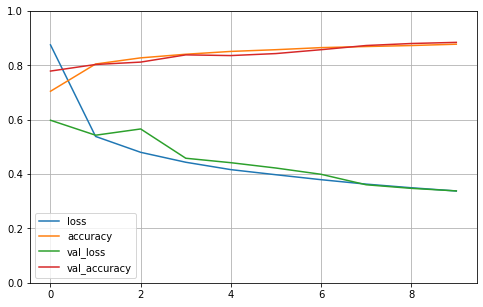

In [14]:
pd.DataFrame(model_history.history).plot(figsize = (8 , 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev = model.evaluate (x_test_n,y_test)

10000/10000 [==============================] - 2s 166us/sample - loss: 0.3644 - accuracy: 0.8699


In [16]:
ev

[0.3644242218732834, 0.8699]

In [17]:
x_new = x_test [:3]

In [18]:
y_pred = model.predict_classes(x_new)

AxesImage(54,36;334.8x217.44)


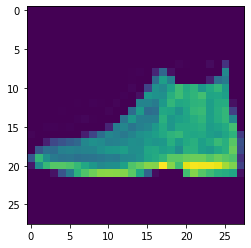

In [19]:
print(plt.imshow(x_test[0].reshape((28,28))))

In [20]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [21]:
del model

# Pooling vs No Pooling

### In this CNN model we remove the Pooling Layers to check excuation time.

In [24]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Conv2D(filters = 32 , kernel_size =(3,3) , strides=1 , padding='valid' , activation='relu' ,input_shape=(28,28,1)))
model_1.add(keras.layers.MaxPooling2D((2,2)))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(300 , activation="relu"))
model_1.add(keras.layers.Dense(100 , activation="relu"))
model_1.add(keras.layers.Dense(10 ,activation = "softmax"))

model_2 = keras.models.Sequential()
model_2.add(keras.layers.Conv2D(filters = 32 , kernel_size =(3,3) , strides=1 , padding='valid' , activation='relu' ,input_shape=(28,28,1)))
model_2.add(keras.layers.MaxPooling2D((2,2)))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(300 , activation="relu"))
model_2.add(keras.layers.Dense(100 , activation="relu"))
model_2.add(keras.layers.Dense(10 ,activation = "softmax"))


In [26]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [27]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [29]:
model_1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

model_2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

In [30]:
model_history_1 = model_1.fit(x_train , y_train , epochs=3 , batch_size=64,
                             validation_data=(x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 23s 413us/sample - loss: 0.8294 - accuracy: 0.7188 - val_loss: 0.5709 - val_accuracy: 0.7858
Epoch 2/3
55000/55000 [==============================] - 22s 405us/sample - loss: 0.5284 - accuracy: 0.8072 - val_loss: 0.5205 - val_accuracy: 0.8114
Epoch 3/3
55000/55000 [==============================] - 23s 422us/sample - loss: 0.4715 - accuracy: 0.8301 - val_loss: 0.5121 - val_accuracy: 0.8248


In [31]:
model_history_1 = model_1.fit(x_train , y_train , epochs=3 , batch_size=64,
                             validation_data=(x_valid , y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/3
55000/55000 [==============================] - 22s 400us/sample - loss: 0.4363 - accuracy: 0.8437 - val_loss: 0.4225 - val_accuracy: 0.8536
Epoch 2/3
55000/55000 [==============================] - 23s 425us/sample - loss: 0.4118 - accuracy: 0.8523 - val_loss: 0.4392 - val_accuracy: 0.8370
Epoch 3/3
55000/55000 [==============================] - 22s 407us/sample - loss: 0.3908 - accuracy: 0.8595 - val_loss: 0.4369 - val_accuracy: 0.8474
